# Exploratory Data Analysis - Data Visualization and Summary Statistics

Welcome to the third notebook of the exploratory data analysis (EDA) series. 

For this notebook you will use the data on ridesharing in the year 2022 in the city of Chicago

### Learning Objectives:
In this notebook you will use the following concepts from the course in a practical setting:
 - Probability
 - Descriptive statistics (mean, median, standard deviation and quartiles)
 - Box plots
 - Joint distribution
 - Marginal distribution
 - Correlation


# 1. Import the Python Libraries

As usual, the first thing you need to do is import the libraries that you will use in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for displaying a map
import folium
from folium.plugins import FastMarkerCluster

# 2. Load the Dataset

The next step is to open the dataset. This is the reduced and cleaned-up version that you used in the previous notebook.

In [2]:
# Open the dataset
# Note the parse_dates parameter, which automatically saves the given columns as dates.
df = pd.read_csv("data/world_happiness_2019.csv")
columns_to_rename = {i: "_".join(i.split(" ")).lower() for i in df.columns}
df.rename(columns=columns_to_rename, inplace=True)

# Show the first few lines of the dataset
df.head()

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# 3. Investigate the Summary Statistics

In the previous notebook you have already plotted some histograms of individual columns to see how the data is distributed. Now it's time to approach this more systematically. Let's look at the numeric values first. Pandas has a very useful function `.describe()`, which returns a new dataframe with summary statistics for each of the columns.  

In [3]:
# Calculate and display the summary statistics
df.describe()

,overall_rank,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [4]:
# add a column with a random integer between 0 and 6, representing the day of the week
np.random.seed(0)
df["weekday"] = np.random.randint(0, 7, df.shape[0])
df.head()

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,weekday
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,4
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,5
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,3
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,3


1. Check the minimum and maximum value for each column. What are their values and how far apart are they? For example: What is the shortest and longest trip that was taken and what is the difference between them?
2. What is mean value of each column? For example: What is the mean trip length? Is it closer to the minimum or maximum value?
3. What is the standard deviation of each column? For example: how much do the trip lengths vary?
4. Compare the quartiles and the mean. Is the mean above or below the median? 

## 3.1 Visualize the Summary Statistics Using Boxplots

A great way to understand your data is to visualize it! A commonly used tool to display summary statistics is a boxplot. Fortunately, it is already integrated to `Pandas`, and you can simply draw it by using `DataFrame.boxplot()`. Remember that the box-plot involves infromation about all the quartiles and the maximum and minumum values of the variable, and it looks something like this

![](./images/box-plot-screenshot.png)


<Axes: >

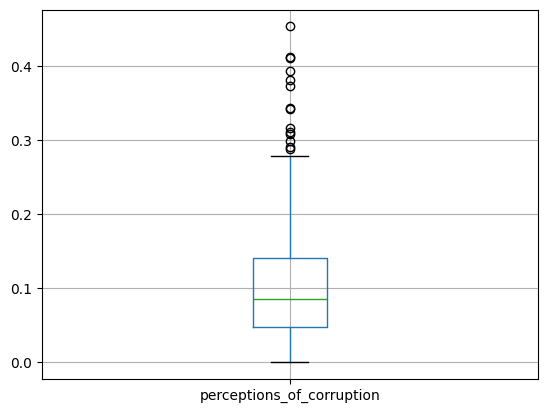

In [5]:
# Select the column which you want to plot. Change this for a different column name,
# if you are interested in plotting other columns
column_to_plot = 'perceptions_of_corruption'

# Display the boxplot
plt.figure()
df.boxplot(column_to_plot)

The blue box shows the interquartile range (IQR), and the horizontal blue lines in the box show the Q1, Q2 (median), and Q3 quartiles. You can see these three numbers in the dataframe above (25%, 50% and 75%). Check whether they align with the plot. The horizontal black lines outside the box show +/- 1.5 times IQR, which is the default range used to identify outliers. The individual datapoints plotted outside the lines are the outliers.

In the case of `fare` you can see a lot of outlier points, can you figure out why? Remember the distribution of this variable

array([[<Axes: title={'center': 'perceptions_of_corruption'}>]],
      dtype=object)

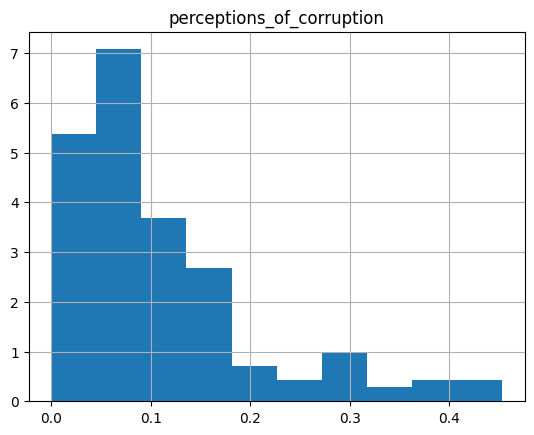

In [6]:
df.hist(column_to_plot, density=True)

As you can see, this distribution is really heavy for smaller values, and has a really long tail, which is the values you are seeing as outliers.

## 3.2 Visualize the Data on different weekdays

If you want to split the data into subsets (for example for given days of the week) and plot a boxplot for each, you can easily do that using the parameter `by`. You just need to set it to the column name you want to use to split the data. Suppose you want to analize the `tip` variable by day of the week. Intuitively, what you are doing is creting classes according to the different days in `weekday`, and then analyzing the data for each of this classes. This way what you are actually doing is exploring the conditional distributions of a variable. In this case, you are looking at the tip given that it's a Monday, the tip given that it's a Tuesday, and so on.

<Axes: title={'center': 'gdp_per_capita'}, xlabel='weekday'>

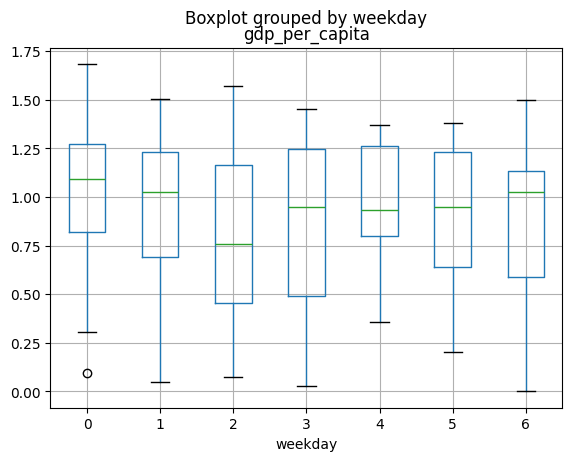

In [7]:
df.boxplot(column='gdp_per_capita', by='weekday')

# Limit the plot in y direction. Comment this line of code to see full data
# plt.ylim(-2, 52)

Another, more obvious, hint is in the summary statistics. Run the cell below to display them again, but this time you will do it just for the `tip` column, grouped by `weekday`.

In [8]:
# Group the data by the day of the week, select the score column and calculate the descriptive statistics.
df.groupby('weekday')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
0,23.0,5.656348,1.107170,2.853,4.74600,5.8880,6.33350,7.554
1,24.0,5.456958,1.090953,3.380,4.68725,5.5660,6.13825,7.343
2,24.0,4.973625,1.067618,3.231,4.35300,4.5675,5.71300,7.246
3,29.0,5.414621,1.219212,3.083,4.36600,5.3730,6.19800,7.494
4,21.0,5.514857,1.043226,3.334,5.08200,5.2470,5.89500,7.769
5,17.0,5.588118,1.040031,4.456,4.71900,5.2850,6.32100,7.600
6,18.0,5.291278,1.182125,3.203,4.30875,5.3740,6.11700,7.167


In [9]:
gr1 = df.groupby('weekday')
print("type of gr:", type(gr1))
print("ngroups:", gr1.ngroups)
print("size: \n", gr1.size())
# print("shape: \n", gr1.shape)
display(gr1)
# print("count: \n", gr1.count())

print(" \n\n ================== ")

# create dataframe from gr2
gr2 = df.groupby('weekday')['score']
print("type of gr2:", type(gr2))
print("ngroups:", gr2.ngroups)
print("size: \n", gr2.size())
display(gr2)
print("count: \n", gr2.count())

type of gr: <class 'pandas.core.groupby.generic.DataFrameGroupBy'>
ngroups: 7
size: 
 weekday
0    23
1    24
2    24
3    29
4    21
5    17
6    18
dtype: int64


 

type of gr2: <class 'pandas.core.groupby.generic.SeriesGroupBy'>
ngroups: 7
size: 
 weekday
0    23
1    24
2    24
3    29
4    21
5    17
6    18
Name: score, dtype: int64


count: 
 weekday
0    23
1    24
2    24
3    29
4    21
5    17
6    18
Name: score, dtype: int64



You can actually measure the correlation between the two variables using Pandas. Let's do it in the cell below!

In [10]:
(df.gdp_per_capita).corr(df.social_support)

np.float64(0.7549057272454567)


# 4. Check the Locations of Rides

Text(0, 0.5, 'Social Support Score')

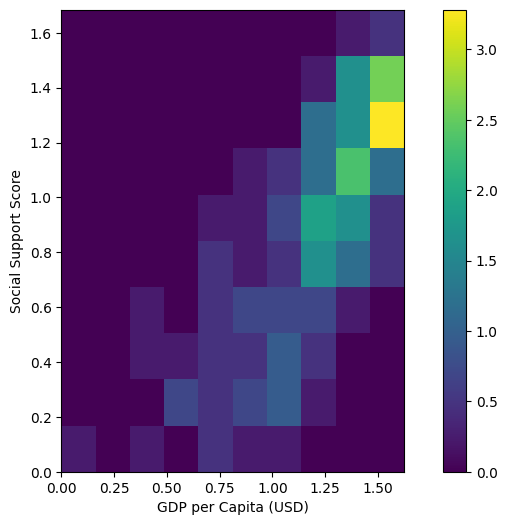

In [11]:
# Select the columns you want to plot
gdp = df.dropna()["gdp_per_capita"].to_numpy()
social_support = df.dropna()["social_support"].to_numpy()
# Plot the 2D histogram
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
hist = ax.hist2d(social_support, gdp, bins=10, density=True)
ax.set_aspect(1.3, "box")
fig.colorbar(hist[3])
ax.set_xlabel("GDP per Capita (USD)")
ax.set_ylabel("Social Support Score")